In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data Sourcing

In [2]:
'''inital data sourcing'''

data = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv')

/var/folders/c2/y0gmhjgn52s4fjvr1c_0n5_c0000gp/T/ipykernel_24668/2132138864.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/cleaned_merged_seasons.csv')


In [3]:
data

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,...,2.0,0.0,0,0,0,0,55,False,0,1
1,1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,...,3.0,23.0,2,0,0,0,80,True,0,1
3,3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,...,1.0,0.0,0,0,0,0,50,False,0,1
4,4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,...,1.0,0.0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98397,98397,2021-22,Wilfred Ndidi,MID,Leicester,0,0,0,0,0.0,...,4.0,0.0,0,-202,22,224,48,True,0,38
98398,98398,2021-22,Matt Ritchie,DEF,Newcastle,0,0,3,0,0.0,...,1.0,0.0,1,143,396,253,49,False,0,38
98399,98399,2021-22,Nathan Redmond,MID,Southampton,0,0,5,0,0.0,...,4.0,0.0,2,455,683,228,59,False,0,38
98400,98400,2021-22,Mathew Ryan,GK,Brighton,0,0,0,0,0.0,...,3.0,0.0,0,-2,0,2,45,True,0,38


## Exploring Data 

In [4]:
'''exploring columns'''
data.columns

Index(['Unnamed: 0', 'season_x', 'name', 'position', 'team_x', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98402 entries, 0 to 98401
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         98402 non-null  int64  
 1   season_x           98402 non-null  object 
 2   name               98402 non-null  object 
 3   position           98402 non-null  object 
 4   team_x             48930 non-null  object 
 5   assists            98402 non-null  int64  
 6   bonus              98402 non-null  int64  
 7   bps                98402 non-null  int64  
 8   clean_sheets       98402 non-null  int64  
 9   creativity         98402 non-null  float64
 10  element            98402 non-null  int64  
 11  fixture            98402 non-null  int64  
 12  goals_conceded     98402 non-null  int64  
 13  goals_scored       98402 non-null  int64  
 14  ict_index          98402 non-null  float64
 15  influence          98402 non-null  float64
 16  kickoff_time       984

## Investigating data for an Individual

In [7]:
'''isolating data for a given player by season'''

kane = data[data['name'] == 'Harry Kane']
kane_agg = kane.groupby(by = 'season_x').agg({'goals_scored': 'sum', 'bps': 'sum', 'creativity': 'sum', 'assists': 'sum', 
                                 'clean_sheets': 'sum', 'threat': 'sum', 'value': 'max', 
                                 'yellow_cards': 'sum', 'red_cards': 'sum', 
                                'penalties_missed': 'sum', 
                                 'penalties_saved': 'sum', 'total_points': 'sum'})
kane_agg

,goals_scored,bps,creativity,assists,clean_sheets,threat,value,yellow_cards,red_cards,penalties_missed,penalties_saved,total_points
season_x,,,,,,,,,,,,
2016-17,29,920,548.4,7,14,1530.0,119,3,0,1,0,224
2017-18,29,781,502.1,2,15,2355.0,131,5,0,1,0,217
2018-19,17,561,430.0,6,9,1359.0,126,5,0,0,0,160
2019-20,18,587,391.0,2,6,1071.0,111,4,0,0,0,158
2020-21,23,880,659.1,14,12,1585.0,119,1,0,0,0,242
2021-22,16,657,629.1,11,13,1609.0,126,5,0,0,0,185


In [8]:
'''taking only the stats we want'''

kane = kane[['goals_scored', 'bps', 'creativity', 'assists', 'clean_sheets', 'threat', 
      'value', 'yellow_cards', 'red_cards', 'penalties_missed', 'penalties_saved', 'total_points']]

<AxesSubplot:>

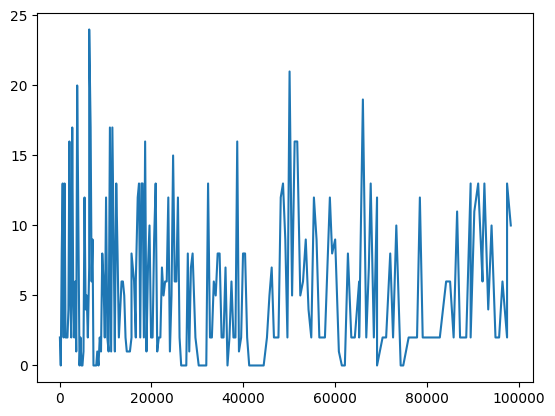

In [9]:
'''viewing performance'''

kane['total_points'].plot()

## Setting up X and y

In [10]:
'''filtering for only data we want'''

df_ngw = data[['goals_scored', 'bps', 'creativity', 'assists', 'clean_sheets', 'threat', 
      'value', 'yellow_cards', 'red_cards', 'penalties_missed', 'penalties_saved', 'total_points']]

In [11]:
df_ngw['next_weeks_points'] = df_ngw['total_points'].shift(-1)

/var/folders/c2/y0gmhjgn52s4fjvr1c_0n5_c0000gp/T/ipykernel_24668/3473777127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ngw['next_weeks_points'] = df_ngw['total_points'].shift(-1)


In [46]:
df_ngw = df_ngw.dropna()

In [48]:
X = df_ngw.drop(columns = ['next_weeks_points'])

In [49]:
X.shape

(98401, 12)

In [50]:
y = df_ngw[['next_weeks_points']]

In [51]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98401 entries, 0 to 98400
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   next_weeks_points  98401 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


## Interacting with the FPL API

In [15]:
base_url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [16]:
response = requests.get(base_url)

In [17]:
base_json = response.json()

In [18]:
elements_df = pd.DataFrame(base_json['elements'])

## Getting ID for all players

In [19]:
'''building a dataframe for searching for the ids necessary for the API to function'''
dct=[]

for x in elements_df.index:
    first_name = elements_df.first_name[x]
    second_name = elements_df.second_name[x]
    player_id = elements_df.id[x]

    player_dict = {'name': first_name + ' ' + second_name,
               'player_id' : player_id}
    dct.append(player_dict)

In [20]:
player_id_df = pd.DataFrame(dct)
player_id_df

,name,player_id
0,Cédric Alves Soares,1
1,Granit Xhaka,3
2,Mohamed Elneny,4
3,Rob Holding,5
4,Thomas Partey,6
...,...,...
704,Harvey Griffiths,658
705,Dexter Lembikisa,664
706,Matheus Santos Carneiro Da Cunha,682
707,Mario Lemina,698


## Getting Stats for the last Gameweek

In [21]:
'''pulls stats only for most recent gameweek to be X input for model'''

def get_last_gameweek(x):
    url = f'https://fantasy.premierleague.com/api/element-summary/{x}/'
    request = requests.get(url)
    r_json = request.json()
    r_json_history_df = pd.DataFrame(r_json['history'])
    return r_json_history_df.tail(1)

In [22]:
get_last_gameweek(427)

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out
20,427,204,9,6,False,2023-01-23T20:15:00Z,0,1,21,90,...,1,0.63320,0.01875,0.65195,1.17890,117,134961,3972957,197872,62911


In [23]:
'''Allows you to search by name and returns only relevant columns for model, the same as the train data'''

def players_last_week(name):
    p_id = player_id_df.loc[player_id_df['name'] == name].values[0][1]
    return get_last_gameweek(p_id)[['goals_scored', 'bps', 'creativity', 'assists', 'clean_sheets',
      'threat', 'value', 'yellow_cards', 'red_cards',
    'penalties_missed', 'expected_goals_conceded',
       'penalties_saved', 'total_points']]
    

In [24]:
players_last_week('Harry Kane')

,goals_scored,bps,creativity,assists,clean_sheets,threat,value,yellow_cards,red_cards,penalties_missed,expected_goals_conceded,penalties_saved,total_points
20,1,24,3.0,0,1,54.0,117,0,0,0,1.17890,0,6


In [25]:
mmscaler = MinMaxScaler()
X = mmscaler.fit_transform(X)

In [52]:
model = LinearRegression()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.score(X_test,y_test)

0.001414603746157983

In [56]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

## Next Steps for Project:

Scale the X and y data, then we can introduce the model, train it on our data and test the accuracy against our train segment before having a go at predicting some future points for the next gameweeks.

Next, we can try refining our variables and models. Initially i would expect dreadful accuracy and i would never expect it to be too high as of course it is an unpredictable game!
